In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving salary1.csv to salary1.csv


In [ ]:
dataset = pd.read_csv('salary1.csv')
dataset

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K
...,...,...,...,...,...
32556,22,10,0,40,<=50K
32557,27,12,0,38,<=50K
32558,40,9,0,40,>50K
32559,58,9,0,40,<=50K


In [ ]:
print(dataset.shape)
print(dataset.head(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


In [ ]:
# Convert income column to numeric values
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

# Print the first 5 rows of the dataset
print(dataset.head(5))


   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0


In [ ]:
X = dataset.iloc[:, :-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]])

In [ ]:
Y = dataset.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
!pip install scikit-learn

In [ ]:
#spliting and training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)

[[ 1.20264866 -2.76154633 -0.14509813 -0.03923011]
 [ 0.25021666 -0.42608063 -0.14509813 -0.03923011]
 [ 0.25021666 -0.42608063 -0.14509813 -0.03923011]
 ...
 [-0.92200734 -0.81532491 -0.14509813  0.85306386]
 [ 0.39674466  1.52014079 -0.14509813 -0.03923011]
 [ 0.03042466 -0.42608063  0.83219401 -0.03923011]]


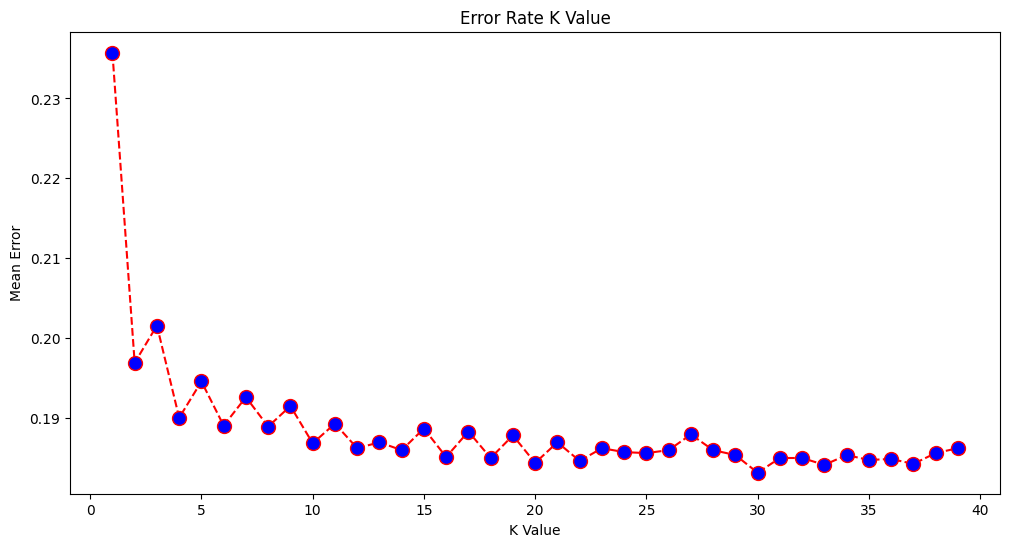

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#------------------------------------------------------#
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_train, Y_train)


KNeighborsClassifier()

In [ ]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Capital Gain: "))
wh = int(input("Enter New Employee's Hours Per Week: "))

newEmp = [[age, edu, cg, wh]]
result = model.predict(sc.transform(newEmp))

if result == 1:
    print("Employee might get salary above 50K")
else:
    print("Employee might not get salary above 50K")

Enter New Employee's Age: 50
Enter New Employee's Education: 12
Enter New Employee's Capital Gain: 1000
Enter New Employee's Hours Per Week: 20
Employee might get salary above 50K


In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy of model: {0}%".format(accuracy * 100))


Confusion Matrix:
[[5700  493]
 [1091  857]]
Accuracy of model: 80.54293084387668%
